In [92]:
import tensorflow as tf
import gzip
import pickle
import matplotlib.pyplot as plt

inputPickleGZIP = gzip.open('./mnist.pkl.gz','rb');
inputData = pickle.load(inputPickleGZIP, encoding="bytes")

(train_X, train_y), (test_X, test_y)= inputData


In [108]:
train_X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [105]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Epoch 1/3
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2636 - acc: 0.9236
Epoch 2/3
60000/60000 [==============================] - 9s 144us/sample - loss: 0.1057 - acc: 0.9669
Epoch 3/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0709 - acc: 0.9774


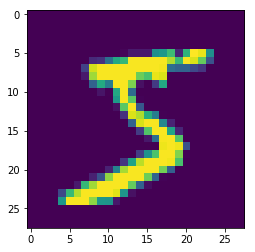

In [93]:
# Scale data (normalization), easier for network to learn:
plt.imshow(train_X[0])
plt.show
train_X = tf.keras.utils.normalize(train_X,axis=1)
test_X = tf.keras.utils.normalize(test_X,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu )) 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu )) 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax ))

model.compile(optimizer ='adam',
             loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# train:
model.fit(train_X, train_y, epochs = 3)




In [94]:
# Test model:
val_loss, val_acc = model.evaluate(test_X, test_y)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.1012 - acc: 0.9681
0.10121877575106919 0.9681


In [98]:
model.save('letter_recog.model')

In [99]:
new_model = tf.keras.models.load_model('letter_recog.model')

In [103]:
# preductions  = new_model.predict([test_X[0]])